# Expectations and the Law of Large Numbers

##### Keywords: expectations, law of large numbers, lotus, distributions, probability

In [3]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Expectations 

$$ \newcommand{\E}[1]{E[#1]}$$

The **expectation value** of a quantity *with respect to the a density or probability mass function* is the weighted sum of the quantity where the weights are probabilties from the distribution. For example, for the discrete random variable $X$:

$$E_f[X] = \sum_x x\,f(x).$$

In the continuous case the sum is replaced by an integral over the density:

$$E_f[X] = \int x\,f(x) dx = \int x dF(x),$$

where the latter form makes it clear that you are weighing with probabilities from the distribution even in the continuous case. 

The latter form is often used to establish notation. Thus, the expected value, or mean, or first moment, of X is defined to be
$$
E_{f}{X} = \int x dF(x) = 
\begin{cases}
\sum_x x f(x) & \text{if X is discrete}\\
\int x f(x) dx & \text{if X is continuous}
\end{cases}
$$
 assuming that the sum (or integral) is well defined. The notation is a unifying notation which nevertheless has a grounding in measure theory; the discrete sum can be said to be an integral with respect to a counting measure.
 
A note on notation: we'll use $E_f$ or sometimes even $E_F$ when we need to make clear what the distribution is. If its clear (or we are being lazy) we might just drop the subscript. Nevertheless, wheneve you see an expectation, **YOU MUST ASK**, with what density/mass-function or distribution is it with respect to.
 
### The mean of a distribution

$E_f[X]$ if often just called the **mean** of the mass function or density. This definition is analogous to the one for the arithmetic mean of a dataset: the only difference is that we want to give more weight to more probable values.


### LOTUS: Law of the unconscious statistician

Also known as **The rule of the lazy statistician**.

**Theorem**:

if $Y = r(X)$, 
$$
\E{Y} = \int r(x) dF(x)
$$

**Example**:

Specifically, let A be an event and let $r(x) = I_A (x)$ where $I_A (x) = 1$ if
$x \in A$ and $I_A (x) = 0$ if $x \notin A$. Then:
$$
\E{I_A (X)} = \int I_A (x) dF(x) = \int_A f_X (x) dx = p(X \in A)
$$

### Variance of a distribution

The variance of a distribution is defined analogous to that of a dataset:

$$V_f[X] = E_f[(X-E_f[X])^2]$$.

For the Bernoulli distribution $f(x)=p=constant$, and you are summing it over ones as opposed to 0's, so the mean is just p. The variance is $(1-p)^2\times p +(-p)^2\times (1-p) = p(1-p)(1-p+p) = p(1-p)$.

In general, we can find this mean that by obtaining a large bunch of samples from the distribution and find their arithmetic mean. The justification for this is the Law of large numbers, which we'll come to soon. 

However the intuition is obvious: for a large number of samples, the frequencies will tract probabilities well, so high probability samples with roughly the same value will re-occur, and a simple arithmetic sun will capture the curves of the distribution.

## The Law of Large Numbers

Imagine a sequence of length n of coin flips. Lets keep increasing the length of the sequence of coin flips n, and compute a running average $S_n$ of the coin-flip random variables,
$$S_n = \frac{1}{n} \sum_{i=1}^{n} x_i .$$
We plot this running mean, and notice that it *converges to the mean of the distribution from which the random variables are plucked*, ie the Bernoulli distribution with p=0.5. 

In [4]:
from scipy.stats.distributions import bernoulli
def throw_a_coin(n):
    brv = bernoulli(0.5)
    return brv.rvs(size=n)

In [5]:
random_flips = throw_a_coin(10000)
running_means = np.zeros(10000)
sequence_lengths = np.arange(1,10001,1)
for i in sequence_lengths:
    running_means[i-1] = np.mean(random_flips[:i])

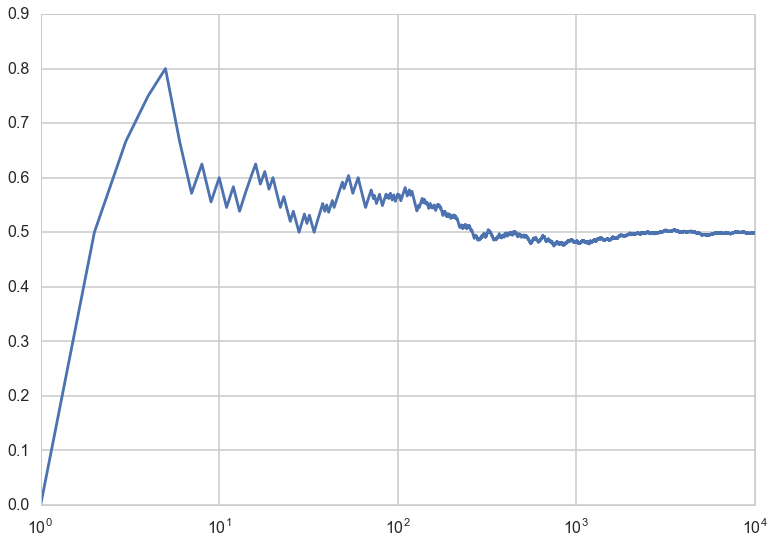

In [6]:
plt.plot(sequence_lengths, running_means);
plt.xscale('log')


This is an example of a very important theorem in statistics, the law of large numbers, which says this:

**Let $x_1,x_2,...,x_n$ be a sequence of independent, identically-distributed (IID) values from a random variable $X$. Suppose that $X$ has the finite mean $\mu$. Then the average of the first n of them:**

$$S_n = \frac{1}{n} \sum_{i=1}^{n} x_i ,$$

**converges to the mean of $X$ $\mu$ as $n \to \infty$:**

$$ S_n \to \mu \, as \, n \to \infty. $$

##  Frequentist interpretation of probability

The law of large numbers is what makes the **frequentist** interpretation of probability possible to use in practise. 

We saw above from the LOTUS that if we consider any event $A$ from a probability distribution $F$ with random variable X, and consider the indicator function $I_A$ such that:

$$\begin{eqnarray}
I_A(x) = 1 \,&& if \, x \in A\\
I_A(x) = 0 \,&&  otherwise
\end{eqnarray}$$

we have that:

$$E_{F}[I_A (X)] = p(X \in A)$$

One can think of variable $Z=I_A(X)$ as Bernoulli random variable with parameter and thus p = P(A).  The question then arises: how do we estimate this expectation value and thus the probability?

Now if we take a long sequence from $X$ and thus $Z$, then the frequency of successes (where success means being in A) will converge by the law of large numbers to the true probability p.
